In [1]:
# Import packages

# Classifiers Models
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from collections import Counter
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier,
RandomForestClassifier, VotingClassifier, HistGradientBoostingClassifier, StackingClassifier)

# Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder, MinMaxScaler, PolynomialFeatures

# model_selection
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, 
learning_curve, cross_val_predict, cross_validate, permutation_test_score, validation_curve, RandomizedSearchCV)

# Metrics
from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report, f1_score)

# Display all columns
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('horse.csv', engine='pyarrow')
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,None,more_3_sec,extreme_pain,absent,severe,None,None,NaN,decreased,distend_large,45.0,8.4,None,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,None,None,pale_cyanotic,less_3_sec,mild_pain,absent,slight,None,None,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,None,None,NaN,normal,normal,33.0,6.7,None,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,None,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,None,None,dark_cyanotic,more_3_sec,None,None,None,None,None,NaN,None,None,74.0,7.4,None,NaN,died,no,4300,0,0,no


In [3]:
# Data Integrity Check
print("Big Query Statistics:")
print('-' * 127)
print(f"🚣‍♀️ DataFrame Shape: {df.shape}")
print('-' * 127)
print(f"Columns to list:\n{df.columns.tolist()}")
print('-' * 127)
print(f"📊 DataFrame Info: {df.info(memory_usage='deep')}")
print('-' * 127)
print(f"📈 DataFrame Distribution:\n {df.describe()}")
print('-' * 127)

missing_values = df.isna().sum()

if len(missing_values) < 0:
    print("❌ Missing data for following columns:")
else:
    print(f"✅ No missing values for df:\n{missing_values}")

Big Query Statistics:
-------------------------------------------------------------------------------------------------------------------------------
🚣‍♀️ DataFrame Shape: (299, 28)
-------------------------------------------------------------------------------------------------------------------------------
Columns to list:
['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3', 'cp_data']
-------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Dat

In [4]:
# Fillna
df.fillna({'rectal_temp': 38.1}, inplace=True) 
df.fillna({'pulse': 72.0}, inplace=True) 
df.fillna({'respiratory_rate': 30.0}, inplace=True) 
df.fillna({'temp_of_extremities': 'cool'}, inplace=True) 
df.fillna({'peripheral_pulse': 'normal'}, inplace=True) 
df.fillna({'mucous_membrane': 'normal_pink'}, inplace=True)
df.fillna({'capillary_refill_time': 'less_3_sec'}, inplace=True) 
df.fillna({'pain': 'mild_pain'}, inplace=True) 
df.fillna({'peristalsis': 'hypomotile'}, inplace=True) 
df.fillna({'abdominal_distention': 'none'}, inplace=True) 
df.fillna({'nasogastric_tube': 'slight'}, inplace=True)
df.fillna({'nasogastric_reflux': 'none'}, inplace=True)
df.fillna({'nasogastric_reflux_ph': 4.7}, inplace=True)
df.fillna({'rectal_exam_feces': 'absent'}, inplace=True)
df.fillna({'abdomen': 'distend_large'}, inplace=True)
df.fillna({'packed_cell_volume': 46.0}, inplace=True)
df.fillna({'total_protein': 24.2}, inplace=True)
df.fillna({'abdomo_appearance': 'cloudy'}, inplace=True)
df.fillna({'abdomo_protein': 3.0}, inplace=True)

In [5]:
# Mean
# Option 1: Use the column name directly
col = 'abdomo_protein'  # Store as string, not Series
print(df[col].value_counts(),'\n')
print(f"Mode: {df[col].mode()}\n")
print(f"Mean: {df[col].mean()}\n")
print(f"Median: {df[col].median()}")

abdomo_protein
3.0     200
2.0      26
1.0      16
3.9       4
2.6       4
3.4       3
2.8       3
3.6       3
5.0       3
7.0       3
4.3       2
2.3       2
5.3       2
6.0       2
4.5       2
1.6       2
4.1       2
8.0       1
4.8       1
2.1       1
3.2       1
4.4       1
2.5       1
1.5       1
10.1      1
4.7       1
3.7       1
5.2       1
2.9       1
10.0      1
1.4       1
0.1       1
2.2       1
6.6       1
7.4       1
1.3       1
3.3       1
Name: count, dtype: int64 

Mode: 0    3.0
Name: abdomo_protein, dtype: float64

Mean: 3.0133779264214047

Median: 3.0


In [6]:
missing_values = df.isna().sum()

if len(missing_values) < 0:
    print("❌ Missing data for following columns:")
else:
    print(f"✅ No missing values for df:\n{missing_values}")

✅ No missing values for df:
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64


In [7]:
# Replace values
df['capillary_refill_time'] = df['capillary_refill_time'].replace('3', 'more_3_sec')

In [8]:
# Value_counts - Unique
objects = df.select_dtypes(include=['object','category'])
for col in objects.columns:
    #print(f"\n{col}:")
    print(f"{'='*127}")
    print(df[col].value_counts())

surgery
yes    180
no     119
Name: count, dtype: int64
age
adult    275
young     24
Name: count, dtype: int64
temp_of_extremities
cool      164
normal     78
warm       30
cold       27
Name: count, dtype: int64
peripheral_pulse
normal       183
reduced      103
absent         8
increased      5
Name: count, dtype: int64
mucous_membrane
normal_pink      126
pale_pink         57
pale_cyanotic     41
bright_pink       30
bright_red        25
dark_cyanotic     20
Name: count, dtype: int64
capillary_refill_time
less_3_sec    219
more_3_sec     80
Name: count, dtype: int64
pain
mild_pain       122
depressed        59
extreme_pain     42
severe_pain      38
alert            38
Name: count, dtype: int64
peristalsis
hypomotile     171
absent          73
hypermotile     39
normal          16
Name: count, dtype: int64
abdominal_distention
none        131
slight       65
moderate     65
severe       38
Name: count, dtype: int64
nasogastric_tube
slight         205
none            71
significant 

In [11]:
# Method 1: Oversample all minority classes to match the majority class
from sklearn.utils import resample
from collections import Counter 

def oversample_to_majority(df, target_column):
    """
    Oversample all minority classes to match the size of the majority class
    """
    # Find the majority class (most frequent)
    class_counts = df['age'].value_counts()
    majority_class = class_counts.index[0]
    majority_count = class_counts.iloc[0]
    
    print(f"Original class distribution:")
    print(class_counts)
    print(f"\nMajority class: {majority_class} with {majority_count} samples")
    
    # Separate classes
    dfs_by_class = {}
    for class_value in df['age'].unique():
        dfs_by_class[class_value] = df[df['age'] == class_value]
    
    # Oversample minority classes
    oversampled_dfs = []
    for class_value, class_df in dfs_by_class.items():
        if len(class_df) < majority_count:
            # Oversample this minority class
            oversampled = resample(class_df,
                                 replace=True,
                                 n_samples=majority_count,
                                 random_state=42)
            oversampled_dfs.append(oversampled)
            print(f"Oversampled class {class_value}: {len(class_df)} -> {len(oversampled)}")
        else:
            # Keep majority class as is
            oversampled_dfs.append(class_df)
            print(f"Kept class {class_value}: {len(class_df)} samples")
    
    # Combine all classes
    balanced_df = pd.concat(oversampled_dfs, ignore_index=True)
    
    print(f"\nFinal class distribution:")
    print(balanced_df['age'].value_counts())
    
    return balanced_df

# Example usage:
if __name__ == "__main__":
    # Assuming you have a dataframe 'df' with target column 'type_of_glass'
    
    # Method 1: Balance to majority class
    balanced_df = oversample_to_majority(df, 'age')   

Original class distribution:
age
adult    275
young     24
Name: count, dtype: int64

Majority class: adult with 275 samples
Kept class adult: 275 samples
Oversampled class young: 24 -> 275

Final class distribution:
age
adult    275
young    275
Name: count, dtype: int64


In [15]:
# Label Encoding
# Check for categorical columns
df.select_dtypes(include=['object', 'category']).head(3) 

# Option 1: Use a loop for multiple columns
categorical_cols = df.select_dtypes(include=['object', 'category'])
label_encoders = {} 

for col in categorical_cols: 
    le = LabelEncoder() 
    df[f'{col}_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for potential inverse transform

In [19]:
df.select_dtypes(include=['object', 'category']).columns

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome', 'surgical_lesion', 'cp_data'], dtype='object')

In [23]:
df.drop(columns=['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 
                 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 
                 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen',
                 'abdomo_appearance', 'outcome', 'surgical_lesion', 'cp_data'], axis=1, inplace=True)

In [21]:
outcome = df['outcome']

## Logistic Regression

Dataset shape: (299, 27)
Feature names: Index(['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3', 'surgery_encoded', 'age_encoded', 'temp_of_extremities_encoded', 'peripheral_pulse_encoded', 'mucous_membrane_encoded', 'capillary_refill_time_encoded', 'pain_encoded', 'peristalsis_encoded', 'abdominal_distention_encoded', 'nasogastric_tube_encoded', 'nasogastric_reflux_encoded', 'rectal_exam_feces_encoded', 'abdomen_encoded', 'abdomo_appearance_encoded', 'surgical_lesion_encoded', 'cp_data_encoded'], dtype='object')
Number of classes: 3
Class distribution: [ 77  44 178]

X Train shape: (239, 27)
Y Train shape: (239,)
X Test shape: (60, 27)
Y Test shape: (60,)
-------------------------------------------------------------------------------------------------------------------------------
--- Basic Model Performance ---
Accuracy test set: 0.6500
Accuracy train set

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__max_iter': 10000, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}

Best Cross-Validation Score: 0.7110
-------------------------------------------------------------------------------------------------------------------------------
--- Tuned Model Performance ---
Accuracy Tuned Test: 0.6667
Accuracy Tuned Train: 0.7824

Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.53      0.56        17
           1       0.60      0.33      0.43         9
           2       0.70      0.82      0.76        34

    accuracy                           0.67        60
   macro avg       0.63      0.56      0.58        60
weighted avg       0.66      0.67      0.65        60
 

              precision    recall  f1-score   support

           0       0.75      0.73      0.74        60
           1       0.83      0.29      0.43        35
           

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Basic Model Logistic Regression Cross-Validation Scores: [0.63333333 0.71666667 0.66666667 0.56666667 0.76271186]
Basic Model Pipeline Cross-Validation Scores: [0.6        0.71666667 0.6        0.75       0.74576271]
Tuned Model Grid Search Cross-Validation Scores: [0.61666667 0.75       0.63333333 0.71666667 0.74576271]

Basic Model Average CV Score LR:     0.6692 ± 0.0675
Basic Model Average CV Score Pipe:  0.6825 ± 0.0683
Tuned Model Average CV Score Grid:  0.6925 ± 0.0565
-------------------------------------------------------------------------------------------------------------------------------


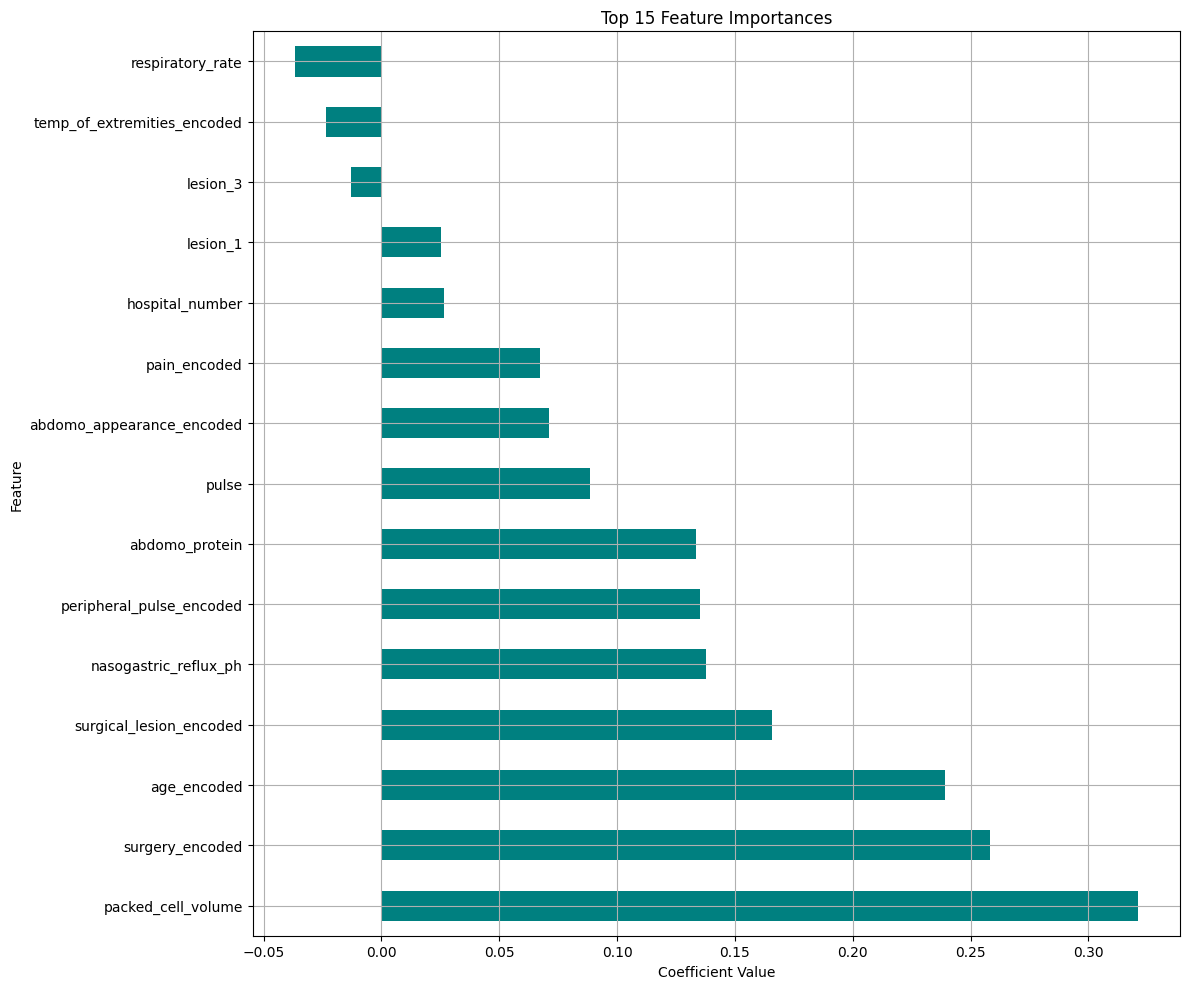

--- Top 10 Most Important Features ---
                           Coefficient
packed_cell_volume            0.320990
surgery_encoded               0.258217
age_encoded                   0.239132
surgical_lesion_encoded       0.165706
nasogastric_reflux_ph         0.137735
peripheral_pulse_encoded      0.135259
abdomo_protein                0.133293
pulse                         0.088329
abdomo_appearance_encoded     0.071081
pain_encoded                  0.067334
--- Bottom 10 Least Important Features ---
                               Coefficient
lesion_2                         -0.057554
nasogastric_reflux_encoded       -0.062450
nasogastric_tube_encoded         -0.065865
peristalsis_encoded              -0.066399
capillary_refill_time_encoded    -0.080333
abdominal_distention_encoded     -0.082621
rectal_exam_feces_encoded        -0.102322
mucous_membrane_encoded          -0.113611
abdomen_encoded                  -0.161088
total_protein                    -0.622551
----------------

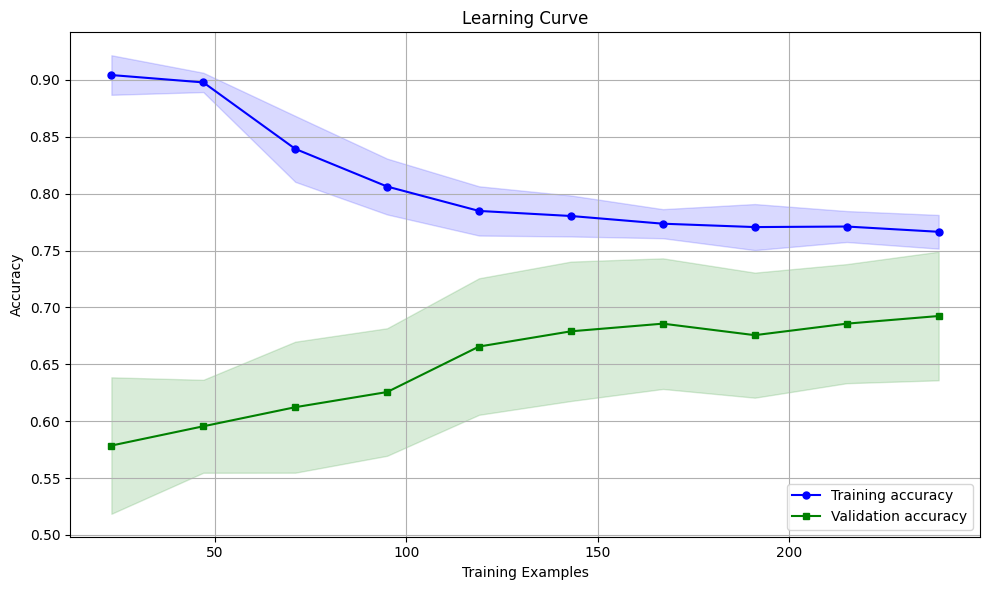

In [25]:
# Logistic Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
X = df.drop(columns=['outcome_encoded'], axis=1)
y = df['outcome_encoded']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

feature_names = X_train.columns  # or X.columns
target_names = y_train.values # or y.values 

# Basic model with default parameters 
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

# Evaluate the basic model
print("--- Basic Model Performance ---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train_lr):.4f}")
print("\nClassification Report:")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred_lr)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train_lr)}")
print("-" * 127)  

# Basic model with default parameters using pipeline
# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', LogisticRegression(random_state=42))  # Logistic regression model
])

pipeline.fit(X_train, y_train)
y_pred_pipeline = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

# Evaluate the basic model
print("--- Basic Model Performance Using Pipeline---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_pipeline):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}")
print("\nClassification Report:")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred_pipeline)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train)}")

# Display confusion matrix
print("—- Confusion Matrix: -—")
print(f"Confusion Matrix test set:\n {confusion_matrix(y_test, y_pred_pipeline)}\n")
print(f"Confusion Matrix train set:\n {confusion_matrix(y_train, y_pred_train)}")
print("-" * 127)  

# Hyperparameter tuning with GridSearchCV
print("--- Model With Hyperparameter Tuning ---")
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],          # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],                               # Regularization type
    'classifier__solver': ['liblinear', 'saga'],                 # Algorithm to use
    'classifier__max_iter': [10000, 50000, 100000],  # Max iterations
    'classifier__class_weight': [None, 'balanced']      # Class weighting
}

# Create grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}\n")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print("-" * 127)  

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
y_pred_tuned_train = best_model.predict(X_train)
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]

print("--- Tuned Model Performance ---")
print(f"Accuracy Tuned Test: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Accuracy Tuned Train: {accuracy_score(y_train, y_pred_tuned_train):.4f}\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred_tuned),'\n')
print(classification_report(y_train, y_pred_tuned_train))
print("-" * 127)   

# Compare basic and tuned models
print("--- Model Comparison ---")
print(f"Basic Model Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Basic Model Accuracy Pipeline: {accuracy_score(y_test, y_pred_pipeline):.4f}")
print(f"Tuned Model Accuracy GridSearch: {accuracy_score(y_test, y_pred_tuned):.4f}\n")

# Calculate cross-validation scores for both models
cv_scores_basic_lr = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
cv_scores_basic_pipe = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
cv_scores_tuned_grid = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print(f"Basic Model Logistic Regression Cross-Validation Scores: {cv_scores_basic_lr}")
print(f"Basic Model Pipeline Cross-Validation Scores: {cv_scores_basic_pipe}")
print(f"Tuned Model Grid Search Cross-Validation Scores: {cv_scores_tuned_grid}\n")

print(f"Basic Model Average CV Score LR:     {cv_scores_basic_lr.mean():.4f} ± {cv_scores_basic_lr.std():.4f}")
print(f"Basic Model Average CV Score Pipe:  {cv_scores_basic_pipe.mean():.4f} ± {cv_scores_basic_pipe.std():.4f}")
print(f"Tuned Model Average CV Score Grid:  {cv_scores_tuned_grid.mean():.4f} ± {cv_scores_tuned_grid.std():.4f}")
print("-" * 127)  

"""
# Plot ROC curve
plt.figure(figsize=(10, 8))

# Calculate ROC curve for basic model using pipeline 
y_prob_basic = pipeline.predict_proba(X_test)[:, 1]
fpr_basic, tpr_basic, _ = roc_curve(y_test, y_prob_basic)
roc_auc_basic = auc(fpr_basic, tpr_basic)

# Calculate ROC curve for tuned model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plot both curves
plt.plot(fpr_basic, tpr_basic, color='blue', lw=2, label=f'Basic Model (AUC = {roc_auc_basic:.4f})')
plt.plot(fpr_tuned, tpr_tuned, color='red', lw=2, label=f'Tuned Model (AUC = {roc_auc_tuned:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
#plt.savefig('roc_curve_comparison.png')
#plt.close() 
plt.show()
""" 

# Feature importance
final_model = best_model.named_steps['classifier']
if hasattr(final_model, 'coef_'):
    # Get feature importances (coefficients)
    importances = pd.DataFrame(
        final_model.coef_[0],
        index=X_train.columns,
        columns=['Coefficient']
    ).sort_values('Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = importances.head(15)
    top_features['Coefficient'].plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('feature_importance.png')
    #plt.close()
    plt.show()
    
    print("--- Top 10 Most Important Features ---")
    print(importances.head(10))
    print("--- Bottom 10 Least Important Features ---")
    print(importances.tail(10))
    print("-" * 127)  

# Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

In [26]:
# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['predictions'] = outcome
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['predictions'] = outcome
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['predictions'] = outcome
display(pipe_model_df.head()) 

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,surgery_encoded,age_encoded,temp_of_extremities_encoded,peripheral_pulse_encoded,mucous_membrane_encoded,capillary_refill_time_encoded,pain_encoded,peristalsis_encoded,abdominal_distention_encoded,nasogastric_tube_encoded,nasogastric_reflux_encoded,rectal_exam_feces_encoded,abdomen_encoded,abdomo_appearance_encoded,surgical_lesion_encoded,cp_data_encoded,predictions
281,527544,38.1,70.0,16.0,4.7,60.0,7.5,3.0,1400,0,0,1,0,1,0,1,1,1,2,3,2,2,0,0,1,1,0,died
265,529865,38.6,68.0,20.0,4.7,38.0,6.5,3.0,5124,0,0,0,0,3,2,5,0,3,2,3,0,2,3,0,0,0,1,lived
164,534925,39.4,120.0,48.0,4.7,56.0,64.0,2.0,1400,0,0,1,0,1,2,1,0,3,2,0,0,2,0,0,0,0,0,euthanized
9,5299629,38.3,90.0,30.0,4.7,40.0,6.2,2.2,0,0,0,0,1,2,2,3,0,2,2,1,2,2,1,0,0,0,1,lived
77,534753,38.7,52.0,20.0,4.7,33.0,77.0,3.0,0,0,0,0,0,3,2,3,0,0,1,1,0,2,3,3,1,0,0,lived


,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,surgery_encoded,age_encoded,temp_of_extremities_encoded,peripheral_pulse_encoded,mucous_membrane_encoded,capillary_refill_time_encoded,pain_encoded,peristalsis_encoded,abdominal_distention_encoded,nasogastric_tube_encoded,nasogastric_reflux_encoded,rectal_exam_feces_encoded,abdomen_encoded,abdomo_appearance_encoded,surgical_lesion_encoded,cp_data_encoded,predictions
281,527544,38.1,70.0,16.0,4.7,60.0,7.5,3.0,1400,0,0,1,0,1,0,1,1,1,2,3,2,2,0,0,1,1,0,died
265,529865,38.6,68.0,20.0,4.7,38.0,6.5,3.0,5124,0,0,0,0,3,2,5,0,3,2,3,0,2,3,0,0,0,1,lived
164,534925,39.4,120.0,48.0,4.7,56.0,64.0,2.0,1400,0,0,1,0,1,2,1,0,3,2,0,0,2,0,0,0,0,0,euthanized
9,5299629,38.3,90.0,30.0,4.7,40.0,6.2,2.2,0,0,0,0,1,2,2,3,0,2,2,1,2,2,1,0,0,0,1,lived
77,534753,38.7,52.0,20.0,4.7,33.0,77.0,3.0,0,0,0,0,0,3,2,3,0,0,1,1,0,2,3,3,1,0,0,lived


,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,surgery_encoded,age_encoded,temp_of_extremities_encoded,peripheral_pulse_encoded,mucous_membrane_encoded,capillary_refill_time_encoded,pain_encoded,peristalsis_encoded,abdominal_distention_encoded,nasogastric_tube_encoded,nasogastric_reflux_encoded,rectal_exam_feces_encoded,abdomen_encoded,abdomo_appearance_encoded,surgical_lesion_encoded,cp_data_encoded,predictions
281,527544,38.1,70.0,16.0,4.7,60.0,7.5,3.0,1400,0,0,1,0,1,0,1,1,1,2,3,2,2,0,0,1,1,0,died
265,529865,38.6,68.0,20.0,4.7,38.0,6.5,3.0,5124,0,0,0,0,3,2,5,0,3,2,3,0,2,3,0,0,0,1,lived
164,534925,39.4,120.0,48.0,4.7,56.0,64.0,2.0,1400,0,0,1,0,1,2,1,0,3,2,0,0,2,0,0,0,0,0,euthanized
9,5299629,38.3,90.0,30.0,4.7,40.0,6.2,2.2,0,0,0,0,1,2,2,3,0,2,2,1,2,2,1,0,0,0,1,lived
77,534753,38.7,52.0,20.0,4.7,33.0,77.0,3.0,0,0,0,0,0,3,2,3,0,0,1,1,0,2,3,3,1,0,0,lived


## RandomForest Tuning 

Dataset shape: (299, 27)
Feature names: Index(['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3', 'surgery_encoded', 'age_encoded', 'temp_of_extremities_encoded', 'peripheral_pulse_encoded', 'mucous_membrane_encoded', 'capillary_refill_time_encoded', 'pain_encoded', 'peristalsis_encoded', 'abdominal_distention_encoded', 'nasogastric_tube_encoded', 'nasogastric_reflux_encoded', 'rectal_exam_feces_encoded', 'abdomen_encoded', 'abdomo_appearance_encoded', 'surgical_lesion_encoded', 'cp_data_encoded'], dtype='object')
Number of classes: 3
Class distribution: [ 77  44 178]

X Train shape: (239, 27)
Y Train shape: (239,)
X Test shape: (60, 27)
Y Test shape: (60,)
-------------------------------------------------------------------------------------------------------------------------------
--- Baseline Random Forest Results ---
Accuracy Test set: 0.7333
Accuracy Tr

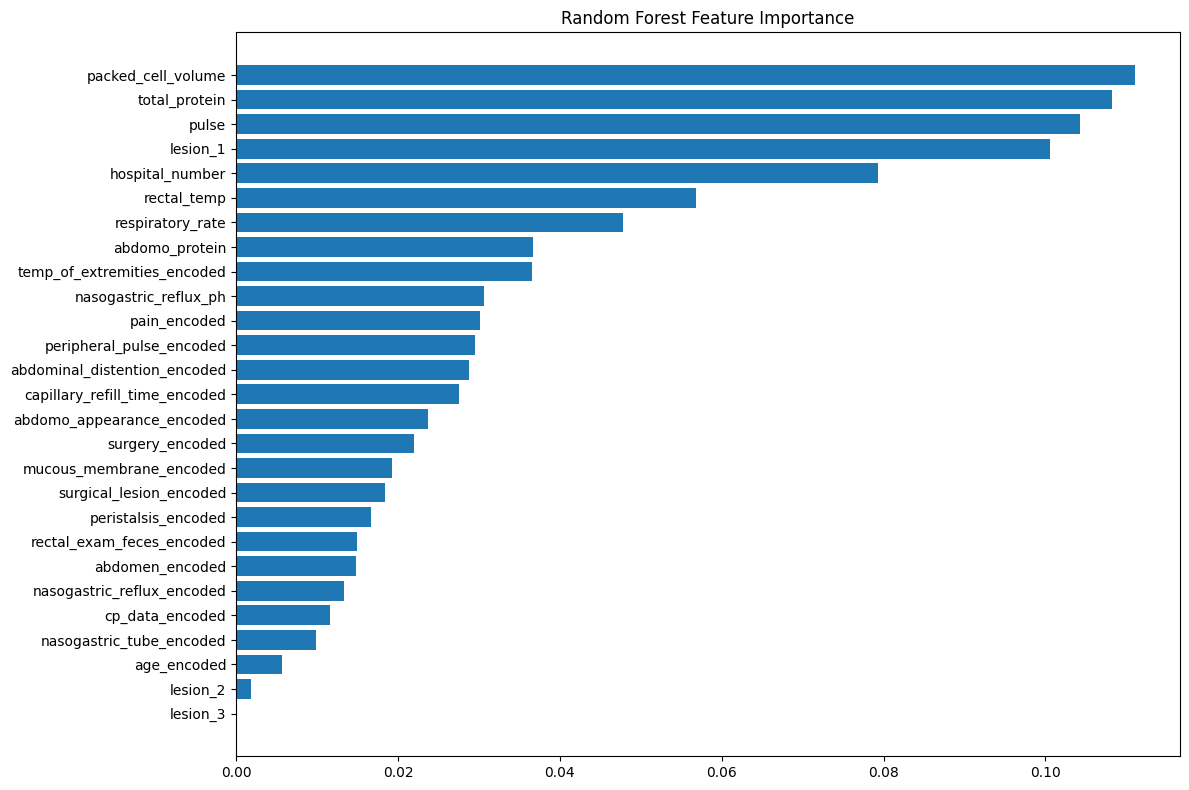

Cross-validation scores: [0.75       0.66666667 0.70833333 0.72916667 0.65957447]
Mean CV accuracy: 0.7027
Standard deviation: 0.0350
-------------------------------------------------------------------------------------------------------------------------------


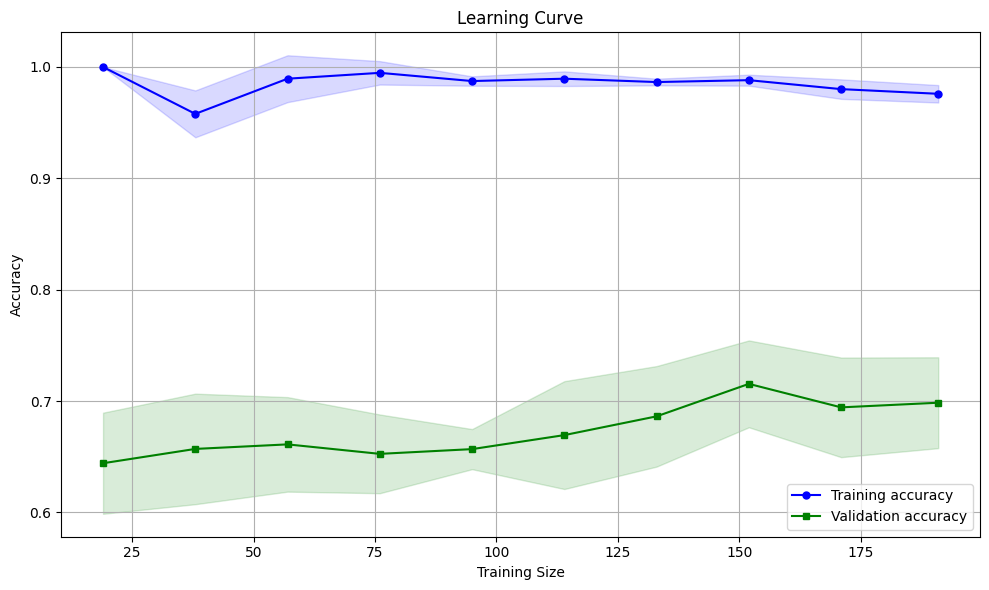

--- Fine-tuning n_estimators ---
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fine-tuned n_estimators: 70
Fine-tuned accuracy: 0.7110
-------------------------------------------------------------------------------------------------------------------------------
--- Final Optimized Model Results ---
Final parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 70}
Accuracy Test: 0.6500
Accuracy Train: 0.9749
Classification Report:

Classification Report Test: 
               precision    recall  f1-score   support

           0       0.69      0.53      0.60        17
           1       0.33      0.22      0.27         9
           2       0.68      0.82      0.75        34

    accuracy                           0.65        60
   macro avg       0.57      0.53      0.54        60
weighted avg       0.63      0.65      0.63        60
 

Classification Report Train: 
               precision    recall  f1-score   support

           0       0.98      0.97   

In [28]:
# RandomForest Tuning 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.datasets import load_breast_cancer

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
X = df.drop(columns=['outcome_encoded'], axis=1)
y = df['outcome_encoded']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Features and target names
feature_names = X.columns
target_names = ['0', '1', '2']

# Feature scaling (optional for RandomForest but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Basic Random Forest model (baseline)
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train_scaled, y_train)
y_pred_base = rf_base.predict(X_test_scaled)
y_pred_base_train = rf_base.predict(X_train_scaled)

print("--- Baseline Random Forest Results ---")
print(f"Accuracy Test set: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"Accuracy Train set: {accuracy_score(y_train, y_pred_base_train):.4f}")
print("Classification Report:")
print("Classification Report Test:",'\n', classification_report(y_test, y_pred_base, target_names=target_names),'\n')
print("Classification Report Train:",'\n', classification_report(y_train, y_pred_base_train, target_names=target_names))
print('-' *127)

# 2. GridSearchCV for hyperparameter tuning
print("--- Grid Search Hyperparameter Tuning ---")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use smaller param_grid for demonstration purposes (to avoid long execution time)
small_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=small_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print('-' *127)

# 3. RandomizedSearchCV (more efficient for large parameter spaces)
print("--- Randomized Search Hyperparameter Tuning ---")
random_grid = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': [None] + list(np.arange(10, 50, 10)),
    'min_samples_split': np.arange(2, 12, 2),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

randomized_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=random_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy',
    random_state=42
)

randomized_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {randomized_search.best_params_}")
print(f"Best cross-validation score: {randomized_search.best_score_:.4f}")
print('-' *127)

# 4. Evaluate the best model from GridSearchCV
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test_scaled)
y_pred_grid_train = best_grid_model.predict(X_train_scaled)
y_prob_grid = best_grid_model.predict_proba(X_test_scaled)[:, 1]

print("--- Best Grid Search Model Evaluation ---")
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Accuracy Train: {accuracy_score(y_train, y_pred_grid_train):.4f}")
print("Classification Report:\n")
print("Classification Report Test:",'\n', classification_report(y_test, y_pred_grid, target_names=target_names),'\n')
print("Classification Report Train:",'\n', classification_report(y_train, y_pred_grid_train, target_names=target_names))
print('-' *127)

# 5. Feature importance analysis
feature_importances = best_grid_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Random Forest Feature Importance')
plt.tight_layout()
#plt.savefig('feature_importance.png')
#plt.close()
plt.show()

# 6. Cross-validation of the best model
cv_scores = cross_val_score(best_grid_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")
print('-' *127)

"""
# 7. ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob_grid)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#plt.savefig('roc_curve.png')
#plt.close()
plt.show()

# 8. Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, 
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
#plt.savefig('confusion_matrix.png')
#plt.close()
plt.show()
""" 

# 9. Learning curves (optional for deeper analysis)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_grid_model, X_train_scaled, y_train, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()

# 10. Fine-tuning specific parameters (optional based on previous findings)
# For example, fine-tuning n_estimators after discovering optimal ranges
print("--- Fine-tuning n_estimators ---")
estimator_range = np.arange(best_grid_model.n_estimators - 50, best_grid_model.n_estimators + 60, 10)
estimator_range = estimator_range[estimator_range > 0]  # Ensure positive values

param_grid_fine = {
    'n_estimators': estimator_range
}

# Create a new RF with the best parameters from before
rf_fine = RandomForestClassifier(
    random_state=42,
    max_depth=best_grid_model.max_depth,
    min_samples_split=best_grid_model.min_samples_split,
    # Add other parameters from best_grid_model as needed
)

grid_search_fine = GridSearchCV(
    estimator=rf_fine,
    param_grid=param_grid_fine,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search_fine.fit(X_train_scaled, y_train)
print(f"Fine-tuned n_estimators: {grid_search_fine.best_params_['n_estimators']}")
print(f"Fine-tuned accuracy: {grid_search_fine.best_score_:.4f}")
print('-' *127)

# 11. Final model with all optimized parameters
final_params = grid_search.best_params_.copy()
final_params['n_estimators'] = grid_search_fine.best_params_['n_estimators']

final_model = RandomForestClassifier(random_state=42, **final_params)
final_model.fit(X_train_scaled, y_train)
y_pred_final = final_model.predict(X_test_scaled)
y_pred_final_train = final_model.predict(X_train_scaled)

print("--- Final Optimized Model Results ---")
print(f"Final parameters: {final_params}")
print(f"Accuracy Test: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Accuracy Train: {accuracy_score(y_train, y_pred_final_train):.4f}")
print("Classification Report:\n")
print("Classification Report Test:",'\n', classification_report(y_test, y_pred_final, target_names=target_names),'\n')
print("Classification Report Train:",'\n', classification_report(y_train, y_pred_final_train, target_names=target_names))
print('-' *127)

# Compare basic and tuned models
print("--- Model Comparison ---")
print(f"Basic Model Accuracy: {accuracy_score(y_test, y_pred_base):.4f}")
print(f"Basic Model Accuracy Pipeline Grid: {accuracy_score(y_test, y_pred_grid):.4f}")
print(f"Tuned Model Accuracy GridSearch: {accuracy_score(y_test, y_pred_final):.4f}\n")

# Calculate cross-validation scores for both models
cv_scores_basic_rf = cross_val_score(rf_base, X, y, cv=5, scoring='accuracy')
cv_scores_basic_rf_grid = cross_val_score(best_grid_model, X, y, cv=5, scoring='accuracy')
cv_scores_tuned_rf_grid = cross_val_score(final_model, X, y, cv=5, scoring='accuracy')

print(f"Basic Model Logistic Regression Cross-Validation Scores: {cv_scores_basic_rf}")
print(f"Basic Model Pipeline Cross-Validation Scores: {cv_scores_basic_rf_grid}")
print(f"Tuned Model Grid Search Cross-Validation Scores: {cv_scores_tuned_rf_grid}\n")

print(f"Basic Model Average CV Score RF:      {cv_scores_basic_rf.mean():.4f} ± {cv_scores_basic_rf.std():.4f}")
print(f"Basic Model Average CV Score Pipe RF: {cv_scores_basic_rf_grid.mean():.4f} ± {cv_scores_basic_rf_grid.std():.4f}")
print(f"Tuned Model Average CV Score Grid RF: {cv_scores_tuned_rf_grid.mean():.4f} ± {cv_scores_tuned_rf_grid.std():.4f}")

In [29]:
# Dataframe Predicted
base_model_df = pd.DataFrame(X_test)
base_model_df['prediction'] = outcome
display(base_model_df.head())

grid_model_df = pd.DataFrame(X_test)
grid_model_df['prediction'] = outcome
display(grid_model_df.head())

pipe_model_df = pd.DataFrame(X_test)
pipe_model_df['prediction'] = outcome
display(pipe_model_df.head()) 

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,surgery_encoded,age_encoded,temp_of_extremities_encoded,peripheral_pulse_encoded,mucous_membrane_encoded,capillary_refill_time_encoded,pain_encoded,peristalsis_encoded,abdominal_distention_encoded,nasogastric_tube_encoded,nasogastric_reflux_encoded,rectal_exam_feces_encoded,abdomen_encoded,abdomo_appearance_encoded,surgical_lesion_encoded,cp_data_encoded,prediction
281,527544,38.1,70.0,16.0,4.7,60.0,7.5,3.0,1400,0,0,1,0,1,0,1,1,1,2,3,2,2,0,0,1,1,0,died
265,529865,38.6,68.0,20.0,4.7,38.0,6.5,3.0,5124,0,0,0,0,3,2,5,0,3,2,3,0,2,3,0,0,0,1,lived
164,534925,39.4,120.0,48.0,4.7,56.0,64.0,2.0,1400,0,0,1,0,1,2,1,0,3,2,0,0,2,0,0,0,0,0,euthanized
9,5299629,38.3,90.0,30.0,4.7,40.0,6.2,2.2,0,0,0,0,1,2,2,3,0,2,2,1,2,2,1,0,0,0,1,lived
77,534753,38.7,52.0,20.0,4.7,33.0,77.0,3.0,0,0,0,0,0,3,2,3,0,0,1,1,0,2,3,3,1,0,0,lived


,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,surgery_encoded,age_encoded,temp_of_extremities_encoded,peripheral_pulse_encoded,mucous_membrane_encoded,capillary_refill_time_encoded,pain_encoded,peristalsis_encoded,abdominal_distention_encoded,nasogastric_tube_encoded,nasogastric_reflux_encoded,rectal_exam_feces_encoded,abdomen_encoded,abdomo_appearance_encoded,surgical_lesion_encoded,cp_data_encoded,prediction
281,527544,38.1,70.0,16.0,4.7,60.0,7.5,3.0,1400,0,0,1,0,1,0,1,1,1,2,3,2,2,0,0,1,1,0,died
265,529865,38.6,68.0,20.0,4.7,38.0,6.5,3.0,5124,0,0,0,0,3,2,5,0,3,2,3,0,2,3,0,0,0,1,lived
164,534925,39.4,120.0,48.0,4.7,56.0,64.0,2.0,1400,0,0,1,0,1,2,1,0,3,2,0,0,2,0,0,0,0,0,euthanized
9,5299629,38.3,90.0,30.0,4.7,40.0,6.2,2.2,0,0,0,0,1,2,2,3,0,2,2,1,2,2,1,0,0,0,1,lived
77,534753,38.7,52.0,20.0,4.7,33.0,77.0,3.0,0,0,0,0,0,3,2,3,0,0,1,1,0,2,3,3,1,0,0,lived


,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,surgery_encoded,age_encoded,temp_of_extremities_encoded,peripheral_pulse_encoded,mucous_membrane_encoded,capillary_refill_time_encoded,pain_encoded,peristalsis_encoded,abdominal_distention_encoded,nasogastric_tube_encoded,nasogastric_reflux_encoded,rectal_exam_feces_encoded,abdomen_encoded,abdomo_appearance_encoded,surgical_lesion_encoded,cp_data_encoded,prediction
281,527544,38.1,70.0,16.0,4.7,60.0,7.5,3.0,1400,0,0,1,0,1,0,1,1,1,2,3,2,2,0,0,1,1,0,died
265,529865,38.6,68.0,20.0,4.7,38.0,6.5,3.0,5124,0,0,0,0,3,2,5,0,3,2,3,0,2,3,0,0,0,1,lived
164,534925,39.4,120.0,48.0,4.7,56.0,64.0,2.0,1400,0,0,1,0,1,2,1,0,3,2,0,0,2,0,0,0,0,0,euthanized
9,5299629,38.3,90.0,30.0,4.7,40.0,6.2,2.2,0,0,0,0,1,2,2,3,0,2,2,1,2,2,1,0,0,0,1,lived
77,534753,38.7,52.0,20.0,4.7,33.0,77.0,3.0,0,0,0,0,0,3,2,3,0,0,1,1,0,2,3,3,1,0,0,lived


In [24]:
df

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,surgery_encoded,age_encoded,temp_of_extremities_encoded,peripheral_pulse_encoded,mucous_membrane_encoded,capillary_refill_time_encoded,pain_encoded,peristalsis_encoded,abdominal_distention_encoded,nasogastric_tube_encoded,nasogastric_reflux_encoded,rectal_exam_feces_encoded,abdomen_encoded,abdomo_appearance_encoded,outcome_encoded,surgical_lesion_encoded,cp_data_encoded
0,530101,38.5,66.0,28.0,4.7,45.0,8.4,3.0,11300,0,0,0,0,1,3,3,1,2,0,2,2,2,1,0,1,0,0,0
1,534817,39.2,88.0,20.0,4.7,50.0,85.0,2.0,2208,0,0,1,0,1,2,4,0,3,0,3,2,2,0,4,1,1,0,0
2,530334,38.3,40.0,24.0,4.7,33.0,6.7,3.0,0,0,0,0,0,2,2,5,0,3,2,1,2,2,3,3,1,2,0,1
3,5290409,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208,0,0,1,1,0,2,2,1,1,0,2,0,0,1,0,2,0,1,1
4,530255,37.3,104.0,35.0,4.7,74.0,7.4,3.0,4300,0,0,0,0,1,2,2,1,3,2,1,2,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,533886,38.1,120.0,70.0,4.7,55.0,65.0,3.0,3205,0,0,1,0,0,2,4,1,1,0,1,2,2,0,0,1,1,0,0
295,527702,37.2,72.0,24.0,4.7,44.0,24.2,3.3,2208,0,0,0,0,1,1,4,1,4,2,0,1,2,0,1,2,1,1,1
296,529386,37.5,72.0,30.0,4.7,60.0,6.8,3.0,3205,0,0,1,0,0,3,4,0,4,0,0,2,2,1,0,1,0,1,0
297,530612,36.5,100.0,24.0,4.7,50.0,6.0,3.4,2208,0,0,1,0,1,3,5,0,3,2,0,1,2,0,1,2,2,1,1
